# Example 1 Automobiles 
Rank the features that are predictive for the price a car 
Use Mutual Information to find out which features are the most valuable. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("autos.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [9]:
# scikit-learn algorithm for mutual infomration requires that you discrete features vs continuous features
# continuous: float dtype
# discrete: label encoding for categorical variables, object dtypes 

# create data sets for X (features) and y (target)
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals -- this converts all categorical entries into numbers (label encoding)
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

print(X.head)

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

<bound method NDFrame.head of      symboling  make  fuel_type  aspiration  num_of_doors  body_style  \
0            3     0          0           0             2           0   
1            3     0          0           0             2           0   
2            1     0          0           0             2           1   
3            2     1          0           0             4           2   
4            2     1          0           0             4           2   
..         ...   ...        ...         ...           ...         ...   
188         -1    20          0           0             4           2   
189         -1    20          0           1             4           2   
190         -1    20          0           0             4           2   
191         -1    20          1           1             4           2   
192         -1    20          0           1             4           2   

     drive_wheels  engine_location  wheel_base  length  ...  num_of_cylinders  \
0           

In [19]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)

    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)

    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb_weight          1.524836
highway_mpg          0.945727
length               0.603687
bore                 0.499768
stroke               0.387426
num_of_cylinders     0.331096
compression_ratio    0.133116
fuel_type            0.047279
Name: MI Scores, dtype: float64

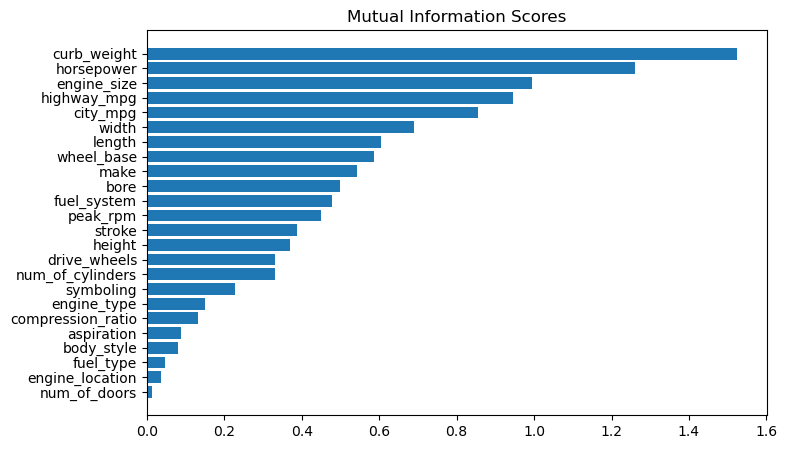

In [20]:
# Bar Chart 
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)


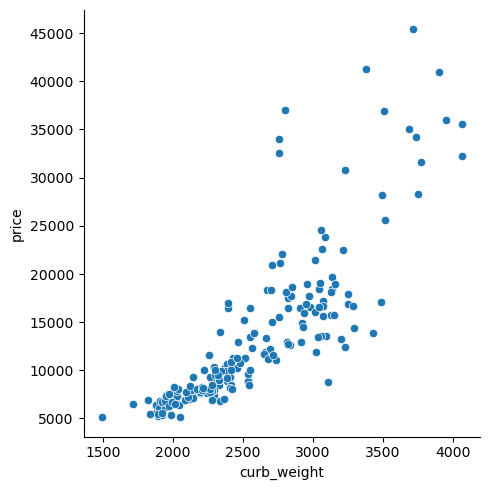

In [23]:
# Take a closer look at the highest rank feature "curb_weight"
# For context "curb_weight" is the weight of the vechicle, this impacts fuel usage, acceleration and handling, and safety 
# ligher cars require less fuel, accelerate faster, usually easier to handle, but not as safe in crashes as heavy cars

# Plot "curb_weight" for more insight into  mutual information
# It is shows a strong correlation
sns.relplot(x="curb_weight", y="price", data=df);



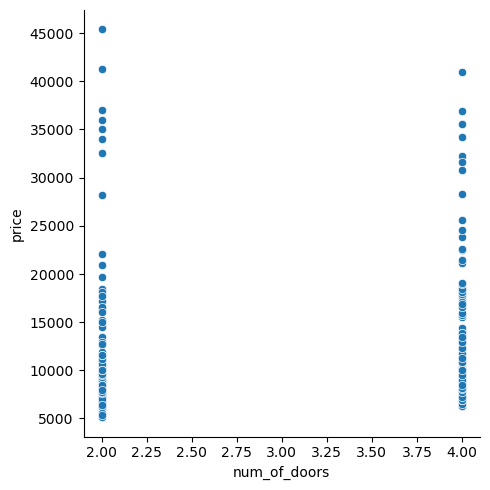

In [24]:
# Conversly fuel_type shows low associate with price
sns.relplot(x="fuel_type", y="price", data=df);


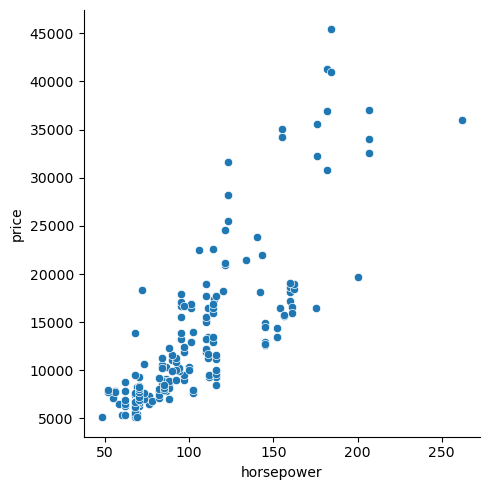

In [31]:
# horsepower has high associate with price
sns.relplot(x="horsepower", y="price", data=df);


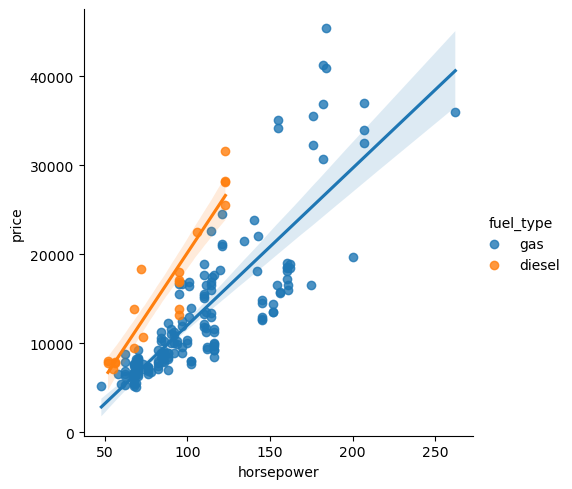

In [32]:
# however because mutual information is univariate its metric doesn't tell us anything about feature interaction
# "fuel_type" in combination with "horse_power" give us a greater association with price? (i guess) 
# premium gas file is needed for greater horse_power, greater horse power == $$$ 
# So there is some association, diesel care are usually less expensive because their not used in pricy high horse powered cars 
sns.lmplot(x="horsepower", y="price", hue="fuel_type", data=df);
